# 决策树的学习曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target.copy()

X = X[y < 50]
y = y[y < 50]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

基于RMSE绘制学习曲线

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
def plot_learining_curve(model, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for k in range(1, len(X_train)+1):
        model.fit(X_train[:k], y_train[:k])
        y_train_predict = model.predict(X_train[:k])
        train_score.append(np.sqrt(mean_squared_error(y_train[:k], y_train_predict)))
        y_test_predict = model.predict(X_test)
        test_score.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))
    train_score = np.array(train_score)
    test_score = np.array(test_score)
    
    plt.plot(np.arange(1, len(train_score)+1), train_score, label="train", color="#f44336")
    plt.plot(np.arange(1, len(test_score)+1), test_score, label="test", color="#ff9800")
    plt.legend()
    plt.show()

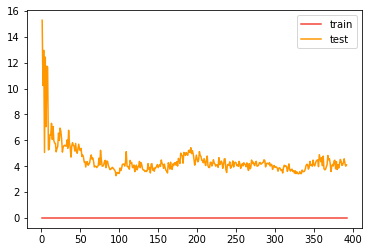

In [9]:
dt_reg = DecisionTreeRegressor()
plot_learining_curve(dt_reg, X_train, X_test, y_train, y_test)

基于R^2值绘制学习曲线

In [10]:
from sklearn.metrics import r2_score
def plot_learining_curve_r2(model, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for k in range(1, len(X_train)+1):
        model.fit(X_train[:k], y_train[:k])
        y_train_predict = model.predict(X_train[:k])
        train_score.append(r2_score(y_train[:k], y_train_predict))
        y_test_predict = model.predict(X_test)
        test_score.append(r2_score(y_test, y_test_predict))
    train_score = np.array(train_score)
    test_score = np.array(test_score)
    
    plt.plot(np.arange(1, len(train_score)+1), train_score, label="train", color="#f44336")
    plt.plot(np.arange(1, len(test_score)+1), test_score, label="test", color="#ff9800")
    plt.legend()
    plt.show()

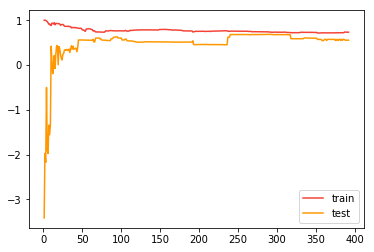

In [12]:
dt_reg = DecisionTreeRegressor(max_depth=2)
plot_learining_curve_r2(dt_reg, X_train, X_test, y_train, y_test)
plt.axis=[]

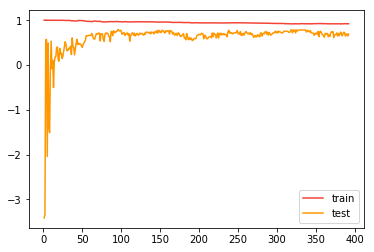

In [13]:
dt_reg = DecisionTreeRegressor(max_depth=5)
plot_learining_curve_r2(dt_reg, X_train, X_test, y_train, y_test)

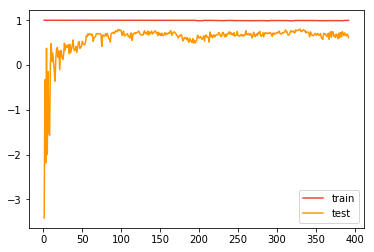

In [14]:
dt_reg = DecisionTreeRegressor(max_depth=10)
plot_learining_curve_r2(dt_reg, X_train, X_test, y_train, y_test)